## SP AI ML CA1
#### Part A: Classification, Titanic dataset

### Data validation

In [1]:
import pandas as pd
import numpy as np

# load the dataset
train = pd.read_csv('data/titanic/train.csv')
test = pd.read_csv('data/titanic/test.csv')

# load data to dataframe

# train data
train_df = pd.DataFrame(train)
# test data
test_df = pd.DataFrame(test)

# combine train and test data
combine = [train_df, test_df]


In [2]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# check the shapes of the dataframes
print('Train data shape: ', train_df.shape)
print('Test data shape: ', test_df.shape)
# test does not have survived column

Train data shape:  (891, 12)
Test data shape:  (418, 11)


In [5]:
# check the data types of the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Age, Fare are floats
- PassengerId, Survived, Sibsp, Parch, Pclass are integers
- Rest are objects

In [6]:
# describe the train data
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- Male is majority of gender, 577 out of 891 people
- Average age is 29 years old
- 147 unique cabins
- Majority of passengers embarked from S, Southampton. There are 3 unique embarkation points

In [7]:
# check the survival rate
train_df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [8]:
# check for missing data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Fill missing values in Age column with median value
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing values in Embarked column with most common value
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

# Fill missing values in Cabin column with 'Unknown'
train_df['Cabin'].fillna('U', inplace=True)
test_df['Cabin'].fillna('U', inplace=True)

# Fill missing values in Fare column with median value
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

- For Age, we fill missing values in the `Age` column of the `train_df` dataframe with the median value of the column. The median is used instead of the mean because it is less sensitive to outliers.

- For Embarked, we fill missing values in the `Embarked` column of the `train_df` dataframe with the most common value in the column. The mode is used because it is a categorical variable.

- For Cabin, we fill missing values in the `Cabin` column of the `train_df` dataframe with the string 'U' (Unknown). This is because there are a large number of missing values in this column, and it is difficult to impute them accurately.

- For Fare, we fill missing values in the `Fare` column of the `train_df` dataframe with the median value of the column. The median is used instead of the mean because it is less sensitive to outliers.

In [10]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Exploratory Data Analysis

C:\Users\kami.cheung\AppData\Local\Temp\ipykernel_21292\3906008568.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(), kde=False, bins=30, ax=axs[1, 0])


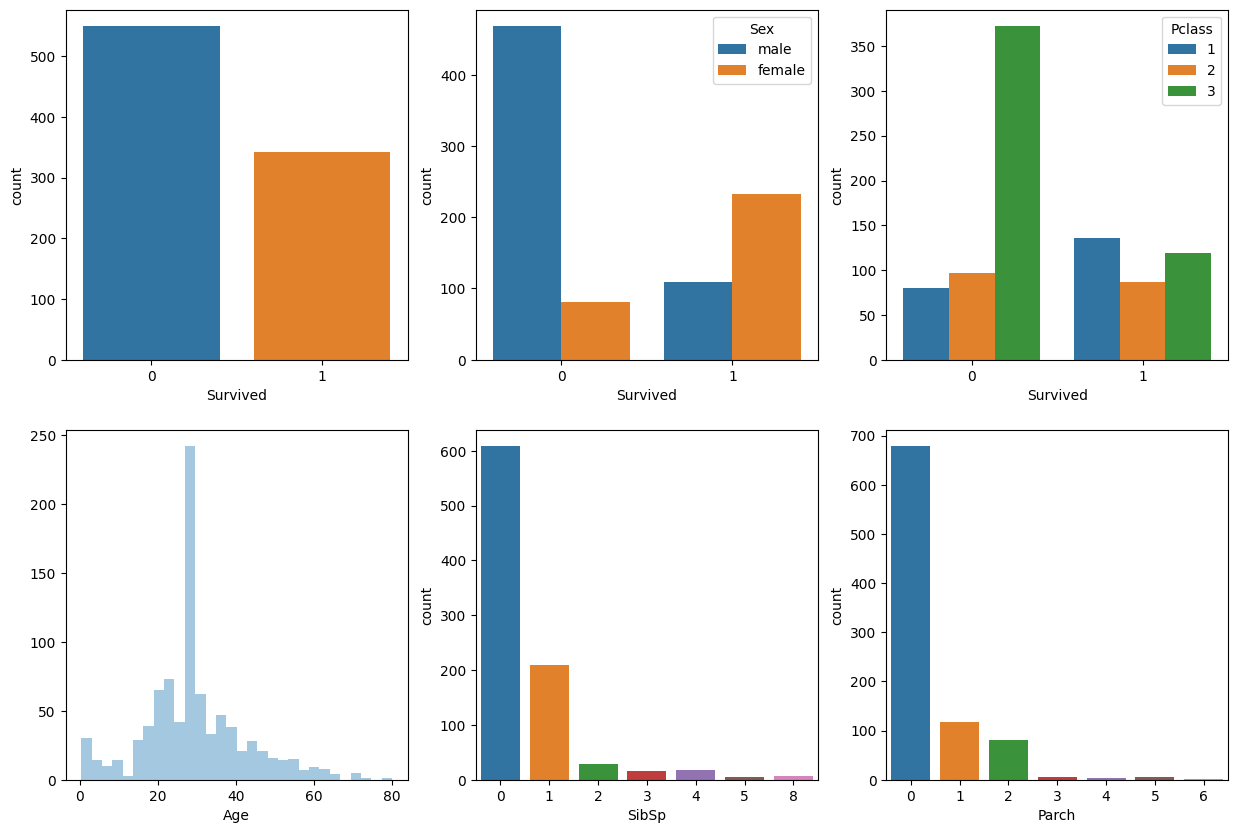

In [11]:
# check the survival rateimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Perform exploratory data analysis (EDA)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(x='Survived', data=train_df, ax=axs[0, 0])
sns.countplot(x='Survived', hue='Sex', data=train_df, ax=axs[0, 1])
sns.countplot(x='Survived', hue='Pclass', data=train_df, ax=axs[0, 2])
sns.distplot(train['Age'].dropna(), kde=False, bins=30, ax=axs[1, 0])
sns.countplot(x='SibSp', data=train_df, ax=axs[1, 1])
sns.countplot(x='Parch', data=train_df, ax=axs[1, 2])

plt.show()

1. `sns.countplot(x='Survived', data=train, ax=axs[0, 0])`: This chart shows the number of passengers who survived and did not survive. The insight is that the majority of passengers did not survive.

2. `sns.countplot(x='Survived', hue='Sex', data=train, ax=axs[0, 1])`: This chart shows the number of passengers who survived and did not survive, broken down by gender. The insight is that the majority of male passengers did not survive, while the majority of female passengers did survive.

3. `sns.countplot(x='Survived', hue='Pclass', data=train, ax=axs[0, 2])`: This chart shows the number of passengers who survived and did not survive, broken down by passenger class. The insight is that the majority of passengers in third class did not survive, while the majority of passengers in first class did survive.

4. `sns.distplot(train['Age'].dropna(), kde=False, bins=30, ax=axs[1, 0])`: This chart shows the distribution of passenger ages. The insight is that the majority of passengers were between 20 and 40 years old.

5. `sns.countplot(x='SibSp', data=train, ax=axs[1, 1])`: This chart shows the number of passengers who had siblings or spouses aboard the Titanic. The insight is that the majority of passengers did not have any siblings or spouses aboard.

6. `sns.countplot(x='Parch', data=train, ax=axs[1, 2])`: This chart shows the number of passengers who had parents or children aboard the Titanic. The insight is that the majority of passengers did not have any parents or children aboard.

In [12]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,U,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#

# Fill missing values in the 'Age' column with the median age value
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
# Fill missing values in the 'Embarked' column with 'S' for 'Southampton'
train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].fillna('S')
# Fill missing values in the 'Cabin' column with 'U' for 'Unknown'
train_df['Cabin'] = train_df['Cabin'].fillna('U')
test_df['Cabin'] = test_df['Cabin'].fillna('U')
# Fill missing values in the 'Fare' column with the median fare value
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

### Feature Engineering

In [13]:
# Extract the deck level from the 'Cabin' column
train_df['Deck'] = train_df['Cabin'].apply(lambda x: x[0])
test_df['Deck'] = test_df['Cabin'].apply(lambda x: x[0])

# Replace the deck levels 'A', 'B', and 'C' with 'ABC', and 'D', 'E', and 'F' with 'DEF'
train_df['Deck'] = train_df['Deck'].replace(['A', 'B', 'C'], 'ABC')
train_df['Deck'] = train_df['Deck'].replace(['D', 'E', 'F'], 'DEF')
test_df['Deck'] = test_df['Deck'].replace(['A', 'B', 'C'], 'ABC')
test_df['Deck'] = test_df['Deck'].replace(['D', 'E', 'F'], 'DEF')

# Create a binary feature 'HasCabin' to indicate whether the passenger had a cabin or not
train_df['HasCabin'] = train_df['Deck'].apply(lambda x: 0 if x == 'U' else 1)
test_df['HasCabin'] = test_df['Deck'].apply(lambda x: 0 if x == 'U' else 1)

# Create a feature 'FamilySize' by adding the 'SibSp' and 'Parch' columns
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Create a binary feature 'IsAlone' to indicate whether the passenger was traveling alone or not
train_df['IsAlone'] = train_df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
test_df['IsAlone'] = test_df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

# Create a feature 'AgeGroup' by binning the 'Age' column into age groups
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 25, 40, 60, 100], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'])
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 25, 40, 60, 100], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'])

# Create a feature 'Title' by extracting the title from the 'Name' column
train_df['Title'] = train_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_df['Title'] = test_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

1. The 'Cabin' column contains many missing values, so we fill them with 'U' for 'Unknown'.
2. The deck level of the cabin may be related to survival, so we extract it from the 'Cabin' column.
3. We group the deck levels 'A', 'B', and 'C' together as 'ABC', and 'D', 'E', and 'F' together as 'DEF' to reduce the number of categories.
4. We create a binary feature 'HasCabin' to indicate whether the passenger had a cabin or not.
5. We create a feature 'FamilySize' by adding the 'SibSp' and 'Parch' columns to capture the size of the passenger's family.
6. We create a binary feature 'IsAlone' to indicate whether the passenger was traveling alone or not.
7. The 'Embarked' column contains a few missing values, so we fill them with 'S' for 'Southampton'.
8. The 'Fare' column contains a few missing values, so we fill them with the median fare value.
9. The 'Age' column contains many missing values, so we fill them with the median age value.
10. We create a feature 'AgeGroup' by binning the 'Age' column into age groups to capture the age range of the passenger.
11. We create a feature 'Title' by extracting the title from the 'Name' column to capture the social status of the passenger.

In [14]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,HasCabin,FamilySize,IsAlone,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,U,0,2,0,Young Adult,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,ABC,1,2,0,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,U,0,1,1,Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,ABC,1,2,0,Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,U,0,1,1,Adult,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S,U,0,1,1,Adult,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,ABC,1,1,1,Young Adult,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,U,S,U,0,4,0,Adult,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,ABC,1,1,1,Adult,Mr


### Scaling and One-hot-encoding

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# Select the numerical features to scale
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train[num_features])

# Transform the training and test data using the scaler
train_df[num_features] = scaler.transform(train[num_features])
test_df[num_features] = scaler.transform(test[num_features])

In [17]:
# Select the features to use in the model
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck', 'HasCabin', 'FamilySize', 'IsAlone', 'AgeGroup', 'Title']

# Encode the categorical features using one-hot encoding
train_encoded = pd.get_dummies(train_df[features])
test_encoded = pd.get_dummies(test_df[features])

In [18]:
train_encoded

,Pclass,Age,SibSp,Parch,Fare,HasCabin,FamilySize,IsAlone,Sex_female,Sex_male,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,3,-0.565736,0.432793,-0.473674,-0.502445,0,2,0,False,True,...,False,False,False,False,True,False,False,False,False,False
1,1,0.663861,0.432793,-0.473674,0.786845,1,2,0,True,False,...,False,False,False,False,False,True,False,False,False,False
2,3,-0.258337,-0.474545,-0.473674,-0.488854,0,1,1,True,False,...,False,True,False,False,False,False,False,False,False,False
3,1,0.433312,0.432793,-0.473674,0.420730,1,2,0,True,False,...,False,False,False,False,False,True,False,False,False,False
4,3,0.433312,-0.474545,-0.473674,-0.486337,0,1,1,False,True,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,-0.181487,-0.474545,-0.473674,-0.386671,0,1,1,False,True,...,False,False,False,False,False,False,False,True,False,False
887,1,-0.796286,-0.474545,-0.473674,-0.044381,1,1,1,True,False,...,False,True,False,False,False,False,False,False,False,False
888,3,-0.104637,0.432793,2.008933,-0.176263,0,4,0,True,False,...,False,True,False,False,False,False,False,False,False,False
889,1,-0.258337,-0.474545,-0.473674,-0.044381,1,1,1,False,True,...,False,False,False,False,True,False,False,False,False,False


The `Title_Master`, `Title_Miss`, and other similar columns were created using one-hot encoding. One-hot encoding is a technique used to convert categorical variables into numerical variables that can be used in machine learning models. 

In this case, the `Title` column was a categorical variable that contained different titles such as 'Mr', 'Mrs', 'Miss', 'Master', and so on. To use this column in a machine learning model, we needed to convert it into numerical variables. One-hot encoding does this by creating a new binary column for each unique value in the categorical variable. 

For example, the `Title` column had the unique values 'Mr', 'Mrs', 'Miss', 'Master', and so on. One-hot encoding created new binary columns called `Title_Master`, `Title_Miss`, `Title_Mr`, `Title_Mrs`, and so on, where each column represented a unique value in the `Title` column. If a passenger had a particular title, such as 'Master', the corresponding binary column `Title_Master` would have a value of 1, and all other binary columns would have a value of 0. 

This technique allows the machine learning model to use categorical variables as input, which can improve the accuracy of the model.

### Model Selection with baseline

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# split train_df into X and y
X = train_encoded
y = train_df['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models to be evaluated
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('LightGBM', lgb.LGBMClassifier()),
    ('XGBoost', xgb.XGBClassifier())
]

# Evaluate each model using cross-validation
results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    results.append((name, acc))

# Output the results in a table
df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
print(df)

                 Model  Accuracy
0  Logistic Regression  0.832402
1                  SVM  0.815642
2        Decision Tree  0.787709
3        Random Forest  0.821229
4             LightGBM  0.804469
5              XGBoost  0.815642


***Logistic regression is the best model, let's tune this to further improve performance***

Logistic Regression model has the highest accuracy among the six models evaluated on the Titanic dataset. There could be several reasons why Logistic Regression performed the best:

1. Linear Separability: Logistic Regression is a linear model that assumes the decision boundary between the two classes is linear. In the Titanic dataset, there could be a linear relationship between the features and the target variable, which makes Logistic Regression a good choice.

2. Robustness to Noise: Logistic Regression is less sensitive to noise in the data compared to other models such as Decision Trees and Random Forests. The Titanic dataset contains missing values and other inconsistencies, which could affect the performance of other models.

3. Low Variance: Logistic Regression has low variance, which means it is less prone to overfitting the training data. The Titanic dataset has a relatively small number of samples, which makes overfitting a concern.

4. Interpretable: Logistic Regression produces coefficients that can be interpreted as the effect of each feature on the target variable. This can provide insights into the underlying relationships between the features and the target variable.

However, it's important to note that the performance of a model can depend on many factors such as the quality of the data, the choice of hyperparameters, and the specific requirements of the task. It's always a good practice to evaluate multiple models and to consider the strengths and weaknesses of each model before making a final decision.

### Hyperparameter tuning using Gridsearch

In [20]:
# Define the grid of hyperparameters to search
grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# Define the model to use
model = LogisticRegression()

# Define the search using cross-validation
search = GridSearchCV(model, grid, scoring='accuracy', cv=5, refit=True, verbose=1)

# Execute the search
search.fit(X_train, y_train)

# Get the results of the search
print(search.best_params_)
print(search.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}
0.832837584950261


After tuning, accuracy improved from 0.8324 to 0.8328

In [21]:
# use the best parameters to train the model and evaluate it on the validation set

# Define the model with the best hyperparameters
model = LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set

# Get predictions
y_pred = model.predict(X_val)

# Print metrics
print('Accuracy:', accuracy_score(y_val, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_val, y_pred))
print('Classification Report:')
print(classification_report(y_val, y_pred))

Accuracy: 0.8324022346368715
Confusion Matrix:
[[90 15]
 [15 59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.80      0.80      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



### Baseline score with Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Titanic dataset
train_df = pd.read_csv('data/titanic/train.csv')

# Drop columns that are not useful for prediction
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing values in the Age column with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Convert categorical variables to numeric using one-hot encoding
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df.drop('Survived', axis=1), train_df['Survived'], test_size=0.2, random_state=42)

# Fit a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = lr.predict(X_val)

# Calculate the accuracy of the model
acc = accuracy_score(y_val, y_pred)
print('Accuracy:', acc)

# use confusion matrix and classification report to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.7988826815642458
[[90 15]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



c:\Users\kami.cheung\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
# Processed model vs. simple baseline accuracy difference
round((0.8324022346368715 - 0.7988826815642458)*100,2)

3.35

**to try: naive bayes

### With feature engineering and hypertuning, there was a 3.35% accuracy improvement from baseline model